In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
#Load data
data = pd.read_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_merged.csv")

In [5]:
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols]  # Features
y = data['Behavior']  # Target variable

# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training set and test set
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.3, random_state=1)  # 70% training and 30% test

# Convert numerical labels to one-hot encoded vectors (for multi-class classification)
num_classes = len(label_encoder.classes_)
y_train_onehot = tf.keras.utils.to_categorical(y_train_encoded, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test_encoded, num_classes=num_classes)


In [6]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.Reshape(target_shape=(12, 1), input_shape=(12, )),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting and monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set up ReduceLROnPlateau to reduce learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with early stopping and learning rate reduction
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_split=0.1, callbacks=[early_stopping, reduce_lr], verbose=1)


Epoch 1/10
6900/6900 [==============================] - 43s 6ms/step - loss: 0.3375 - accuracy: 0.8804 - val_loss: 0.1848 - val_accuracy: 0.9325 - lr: 0.0010
Epoch 2/10
6900/6900 [==============================] - 37s 5ms/step - loss: 0.1718 - accuracy: 0.9406 - val_loss: 0.1417 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 3/10
6900/6900 [==============================] - 39s 6ms/step - loss: 0.1479 - accuracy: 0.9501 - val_loss: 0.1215 - val_accuracy: 0.9556 - lr: 0.0010
Epoch 4/10
6900/6900 [==============================] - 39s 6ms/step - loss: 0.1383 - accuracy: 0.9535 - val_loss: 0.1223 - val_accuracy: 0.9584 - lr: 0.0010
Epoch 5/10
6900/6900 [==============================] - 40s 6ms/step - loss: 0.1342 - accuracy: 0.9548 - val_loss: 0.1311 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 6/10
6900/6900 [==============================] - 38s 5ms/step - loss: 0.1317 - accuracy: 0.9556 - val_loss: 0.1104 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 7/10
6900/6900 [==============================

In [7]:
# Assuming the model variable contains the compiled CNN model, you can train it using:
#model.fit(X_train, y_train, epochs=10, batch_size=32)

# After training, you can evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')


3286/3286 [==============================] - 11s 3ms/step - loss: 0.0991 - accuracy: 0.9661
Test loss: 0.09907764196395874, Test accuracy: 0.9661188125610352


3286/3286 [==============================] - 14s 4ms/step


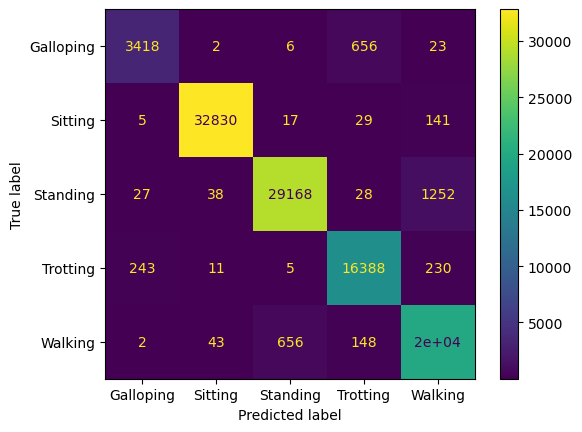

              precision    recall  f1-score   support

   Galloping       0.93      0.83      0.88      4105
     Sitting       1.00      0.99      1.00     33022
    Standing       0.98      0.96      0.97     30513
    Trotting       0.95      0.97      0.96     16877
     Walking       0.92      0.96      0.94     20615

    accuracy                           0.97    105132
   macro avg       0.95      0.94      0.95    105132
weighted avg       0.97      0.97      0.97    105132



In [13]:
# Predict labels on the test data
y_pred_prob = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_prob, axis=1)
y_true_labels = np.argmax(y_test_onehot, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking'])
disp.plot()
plt.show()

# Print classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking']))